# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import  Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    
)

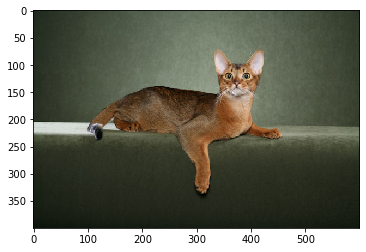

In [3]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


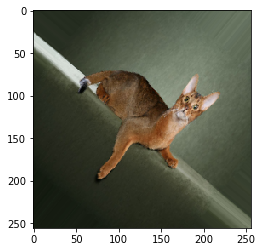

In [5]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-100, -50, 50, 100],
    height_shift_range = [-50, 50]
)

Found 1 images belonging to 1 classes.


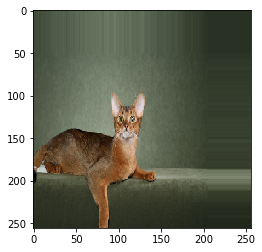

In [11]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


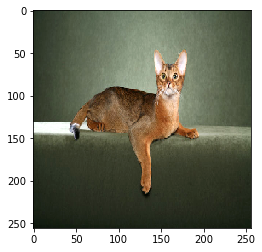

In [14]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5, 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


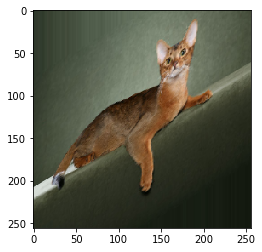

In [16]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


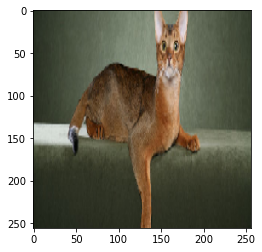

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.5, 1.2]
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


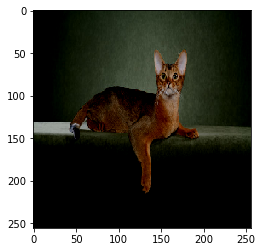

In [20]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 1 images belonging to 1 classes.


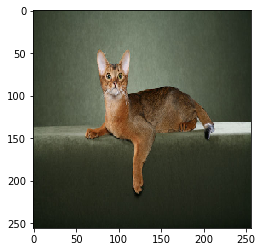

In [24]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True, 
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#x_mean = x_train.mean()
#x_std =x_train.std()
#x_train_norm = (x_train - x_mean) / x_std
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True, #(x_train - x_mean
    featurewise_std_normalization=True # / x_std
)

generator.fit(x_train) # apply on the entire set

In [28]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.5986333 0.8553722 [[3]]
120.70756512369792


### Samplewise

In [29]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.0 1.0 [[9]]


# Task 10: Rescale and Preprocessing Function

In [30]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [31]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [32]:
print(x.mean(), x.std(), y)

-0.40055147 0.4800363 [[2]]


# Task 11: Using in Model Training

In [34]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=40,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,
                                       input_shape=(32,32,3),
                                       pooling='avg'
                                      ),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam', 
             metrics=['accuracy']
             )

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    epochs=1, steps_per_epoch=20
)

  ...
    to  
  ['...']
Train for 20 steps
 5/20 [======>.......................] - ETA: 6s - loss: 3.2629 - accuracy: 0.1750